In [5]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os

In [7]:
df = pd.read_csv('/content/grive/MyDrive/Copy of data.csv')

In [8]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [9]:
df.tail()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,68,0,0,0,0.000,1390,squad-fpp,29,29,1472,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,10,0,2,1,179.600,2030,solo-fpp,97,92,1508,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,25,0,1,1,2.804,1909,duo,47,47,1494,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,45,0,0,0,0.000,1299,squad-fpp,31,30,1627,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,15,1691,2,2,52.520,1370,squad-fpp,27,26,-1,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1.11174e+06,NaN,NaN,NaN,2.22436e+06,1.28388e+06,6,1.11244e+06,2.22377e+06,3.33795e+06,4.44696e+06
Id,1111742,1111742,67e7657a9c48ae,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,1111742,870622,14d6b54cdec6bc,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,1111742,47951,f7182fcc0d8cc8,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,1.11174e+06,NaN,NaN,NaN,0.233674,0.589403,0,0,0,0,17
boosts,1.11174e+06,NaN,NaN,NaN,1.10666,1.71605,0,0,0,2,24
damageDealt,1.11174e+06,NaN,NaN,NaN,130.736,171.176,0,0,84.11,185.9,5990
DBNOs,1.11174e+06,NaN,NaN,NaN,0.657361,1.14602,0,0,0,1,35
headshotKills,1.11174e+06,NaN,NaN,NaN,0.226649,0.603336,0,0,0,0,64
heals,1.11174e+06,NaN,NaN,NaN,1.37035,2.68382,0,0,0,2,73


In [11]:
df1=df.drop(['Id'],axis=1)

In [15]:
df.shape

(1111742, 30)

df.info()

In [90]:
df1=df.drop(['Id'],axis=1) #dropping id column
df1.head()

,Unnamed: 0,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [30]:
df.isnull().sum()#Missing Values

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
#one null value in winplaceperc
#Treating null value with mean

In [36]:
df['winPlacePerc'].fillna(df['winPlacePerc'].mean(),inplace=True)

In [38]:
df['winPlacePerc'].isnull().sum()

0

In [32]:
#Value counts for variables
df.groupId.value_counts()

14d6b54cdec6bc    17
7385e5fe214021    16
128b07271aa012    16
6a292d4d1a0207    12
b8275198faa03b    11
                  ..
514c9286989491     1
8df8296f9a2079     1
2a2d664ae146e7     1
76a832bd3d84b0     1
79bb27003b2f7e     1
Name: groupId, Length: 870622, dtype: int64

In [34]:
df.matchType.value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [39]:
#univariate Analysis

In [45]:
df.assists.describe()

count    1.111742e+06
mean     2.336738e-01
std      5.894028e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.700000e+01
Name: assists, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


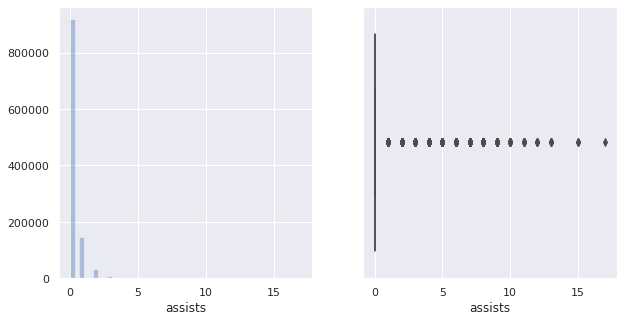

In [46]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1,ncols=2, figsize=fig_dims)
sns.distplot(df.assists, kde= False, ax=axs[0])
sns.boxplot(x='assists',data=df,ax=axs[1])

In [23]:
#Remove outliers
def remove_outlier(assists):
    sorted(assists)
    Q1,Q3=np.percentile(assists,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1 * IQR)
    upper_range= Q3+(1* IQR)
    return lower_range, upper_range
lower_range,upper_range=remove_outlier(df['assists'])
df['assists']=np.where(df['assists']>upper_range,upper_range,df['assists'])
df['assists']=np.where(df['assists']<lower_range,lower_range,df['assists'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


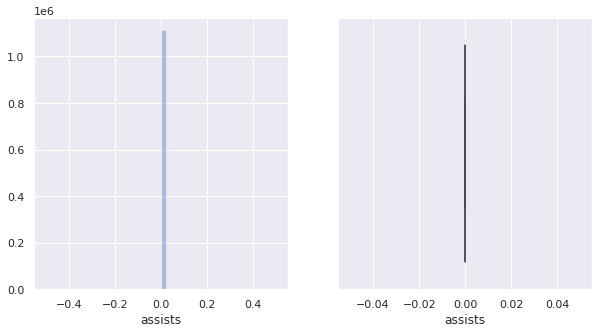

In [24]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1,ncols=2, figsize=fig_dims)
sns.distplot(df.assists, kde= False, ax=axs[0])
sns.boxplot(x='assists',data=df,ax=axs[1])

In [25]:
df.assists.describe()

count    1111742.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: assists, dtype: float64

In [49]:
df.boosts.describe()

count    1.111742e+06
mean     1.106655e+00
std      1.716050e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      2.400000e+01
Name: boosts, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


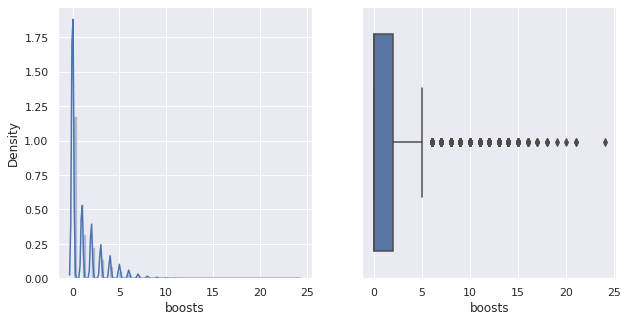

In [50]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1,ncols=2,figsize=fig_dims)
sns.distplot(df.boosts, kde=True, ax=axs[0])
sns.boxplot(x='boosts',data=df,ax=axs[1])

In [27]:
#Remove outliers
def remove_outlier(boosts):
    sorted(boosts)
    Q1,Q3=np.percentile(boosts,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1 * IQR)
    upper_range= Q3+(1* IQR)
    return lower_range, upper_range
lower_range,upper_range=remove_outlier(df['boosts'])
df['boosts']=np.where(df['boosts']>upper_range,upper_range,df['boosts'])
df['boosts']=np.where(df['boosts']<lower_range,lower_range,df['boosts'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


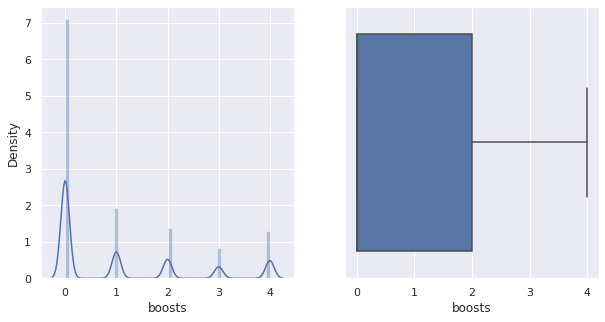

In [28]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1,ncols=2,figsize=fig_dims)
sns.distplot(df.boosts, kde=True, ax=axs[0])
sns.boxplot(x='boosts',data=df,ax=axs[1])

In [29]:
df.boosts.describe()

count    1.111742e+06
mean     9.853986e-01
std      1.367588e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      4.000000e+00
Name: boosts, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


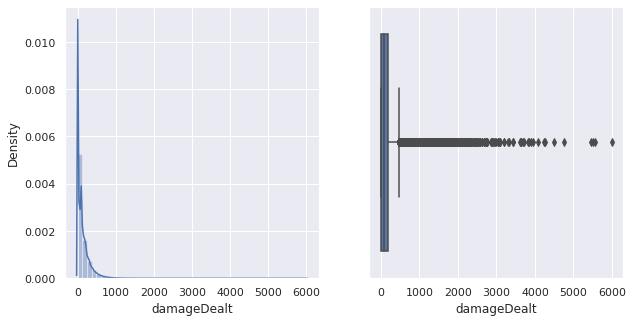

In [53]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.damageDealt,kde=True,ax=axs[0])
sns.boxplot(x='damageDealt',data=df,ax=axs[1])

In [31]:
def remove_outlier(damageDealt):
    sorted(damageDealt)
    Q1,Q3=np.percentile(damageDealt,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1 * IQR)
    upper_range= Q3+(1* IQR)
    return lower_range, upper_range
lower_range,upper_range=remove_outlier(df['damageDealt'])
df['damageDealt']=np.where(df['damageDealt']>upper_range,upper_range,df['damageDealt'])
df['damageDealt']=np.where(df['damageDealt']<lower_range,lower_range,df['damageDealt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


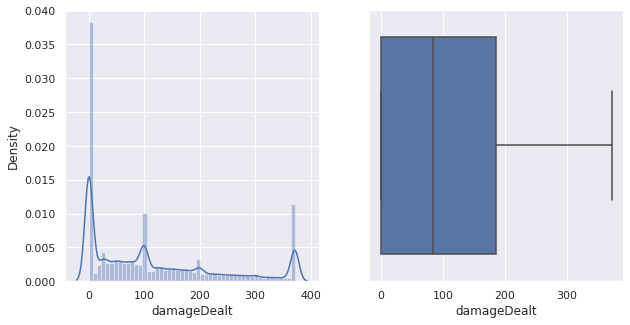

In [33]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.damageDealt,kde=True,ax=axs[0])
sns.boxplot(x='damageDealt',data=df,ax=axs[1])

In [34]:
df.damageDealt.describe()

count    1.111742e+06
mean     1.149481e+02
std      1.196414e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.411000e+01
75%      1.859000e+02
max      3.718000e+02
Name: damageDealt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


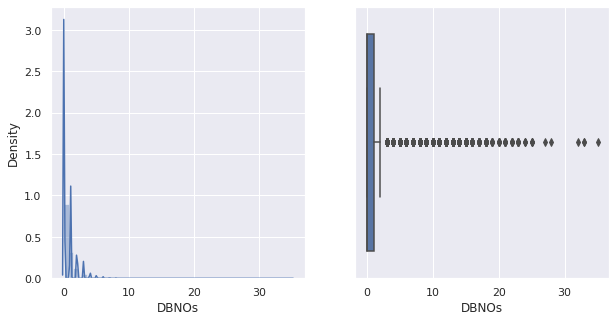

In [54]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.DBNOs,kde=True,ax=axs[0])
sns.boxplot(x='DBNOs',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


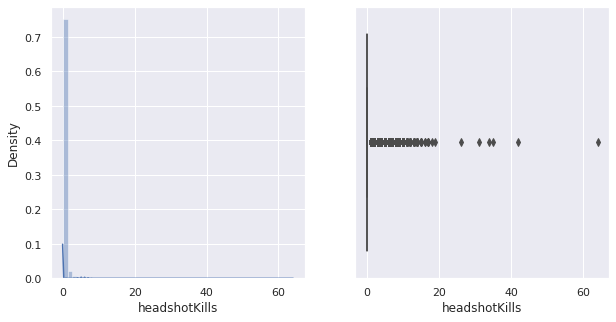

In [55]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.headshotKills,kde=True,ax=axs[0])
sns.boxplot(x='headshotKills',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


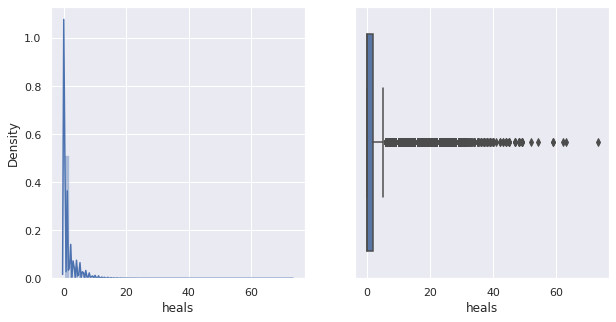

In [56]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.heals,kde=True,ax=axs[0])
sns.boxplot(x='heals',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


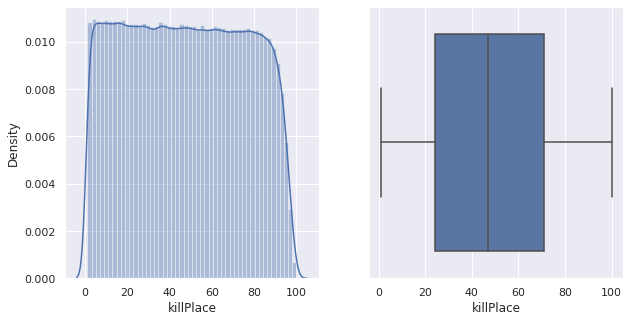

In [57]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.killPlace,kde=True,ax=axs[0])
sns.boxplot(x='killPlace',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


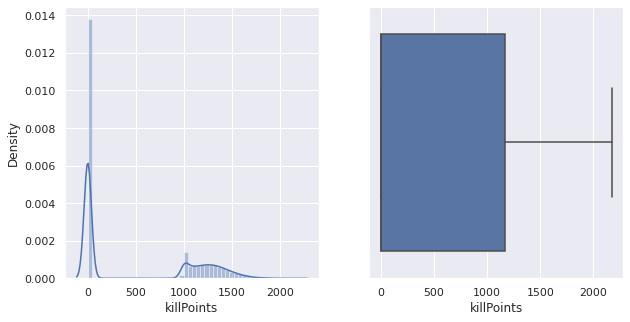

In [58]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.killPoints,kde=True,ax=axs[0])
sns.boxplot(x='killPoints',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


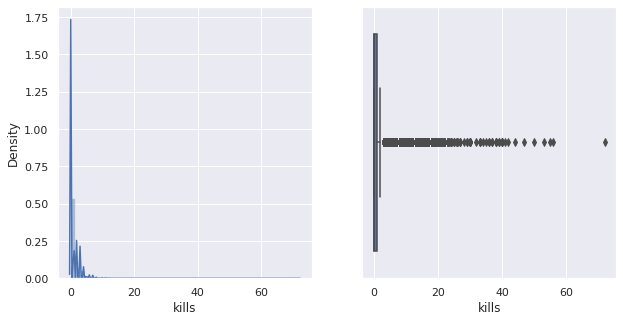

In [59]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.kills,kde=True,ax=axs[0])
sns.boxplot(x='kills',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


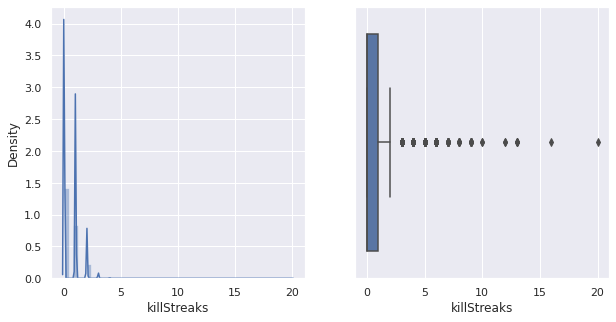

In [60]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.killStreaks,kde=True,ax=axs[0])
sns.boxplot(x='killStreaks',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


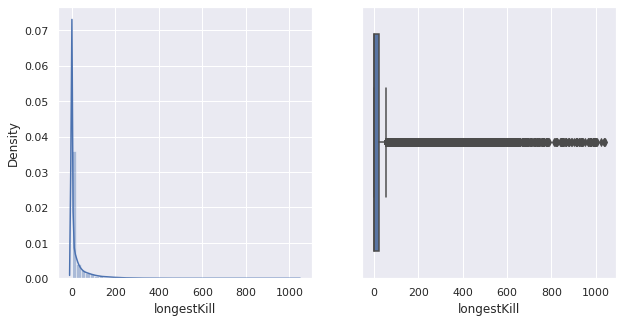

In [61]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.longestKill,kde=True,ax=axs[0])
sns.boxplot(x='longestKill',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


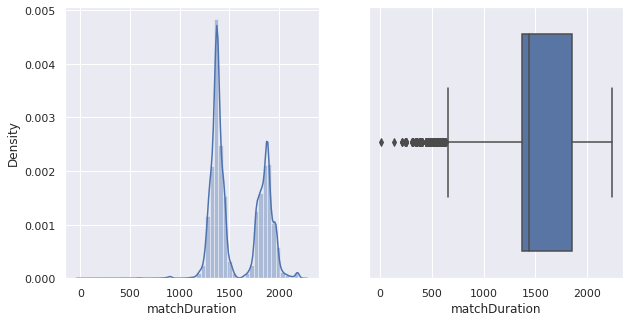

In [62]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.matchDuration,kde=True,ax=axs[0])
sns.boxplot(x='matchDuration',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


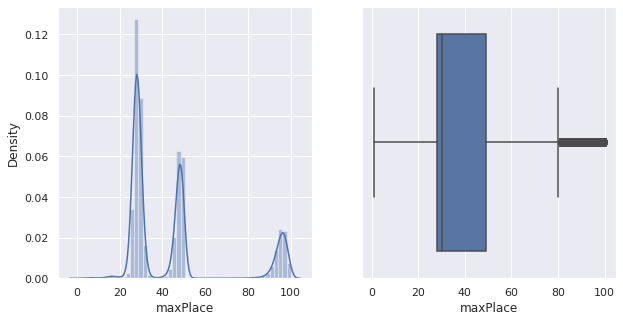

In [63]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.maxPlace,kde=True,ax=axs[0])
sns.boxplot(x='maxPlace',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


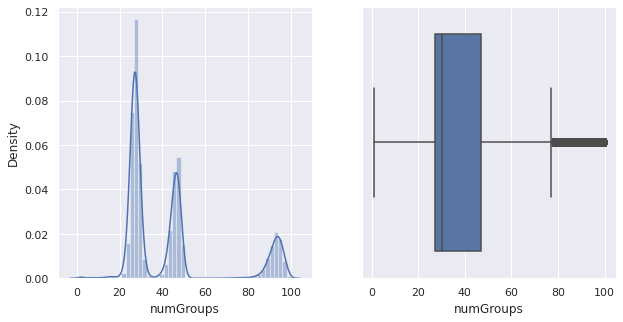

In [64]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.numGroups,kde=True,ax=axs[0])
sns.boxplot(x='numGroups',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


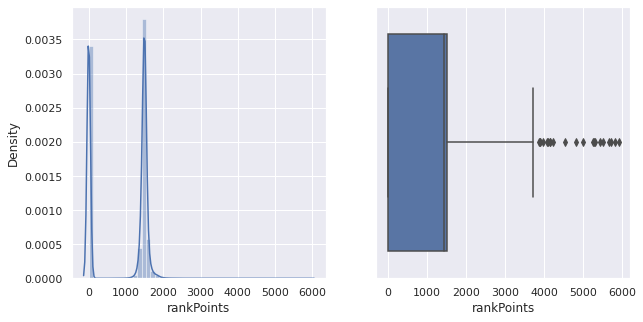

In [66]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.rankPoints,kde=True,ax=axs[0])
sns.boxplot(x='rankPoints',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


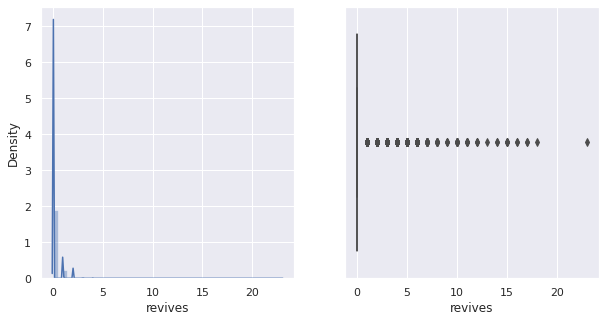

In [67]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.revives,kde=True,ax=axs[0])
sns.boxplot(x='revives',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


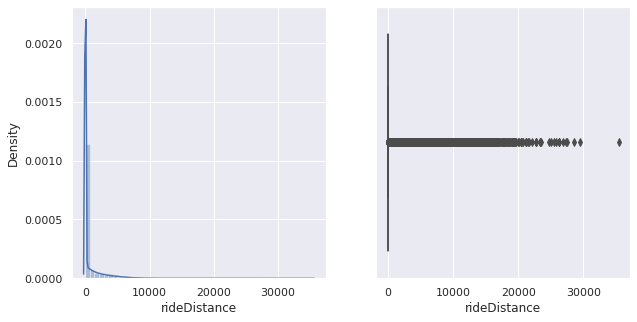

In [68]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.rideDistance,kde=True,ax=axs[0])
sns.boxplot(x='rideDistance',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


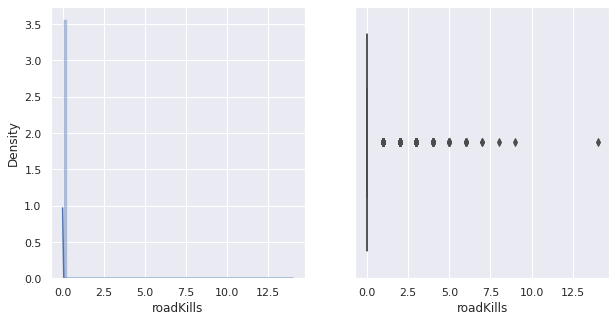

In [69]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.roadKills,kde=True,ax=axs[0])
sns.boxplot(x='roadKills',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


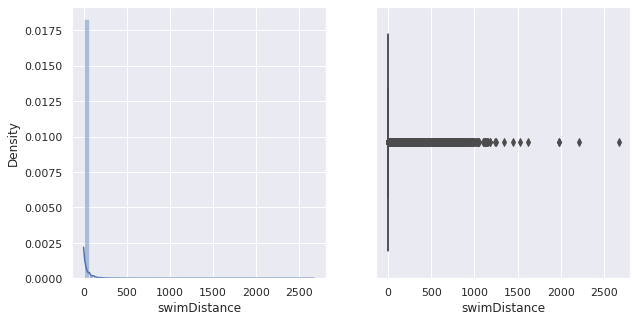

In [70]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.swimDistance,kde=True,ax=axs[0])
sns.boxplot(x='swimDistance',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


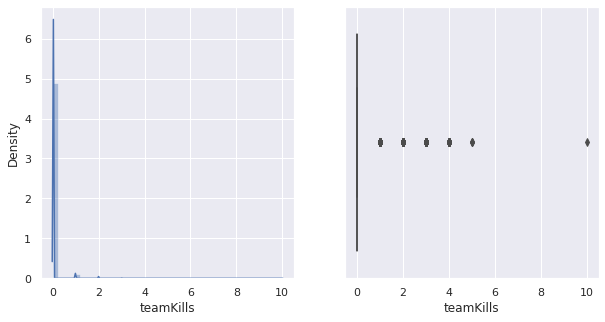

In [71]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.teamKills,kde=True,ax=axs[0])
sns.boxplot(x='teamKills',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


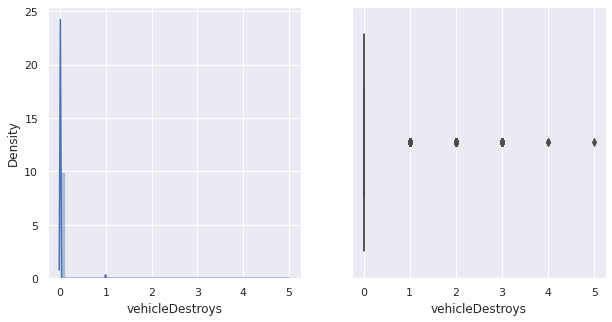

In [72]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.vehicleDestroys,kde=True,ax=axs[0])
sns.boxplot(x='vehicleDestroys',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


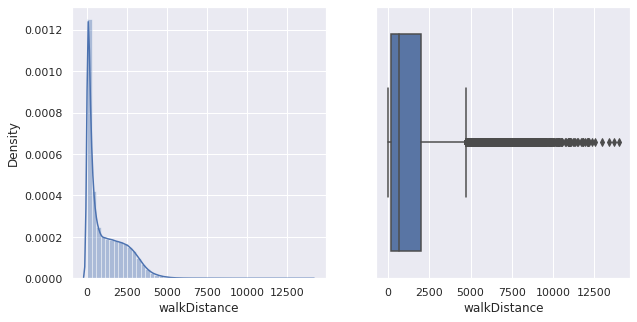

In [73]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.walkDistance,kde=True,ax=axs[0])
sns.boxplot(x='walkDistance',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


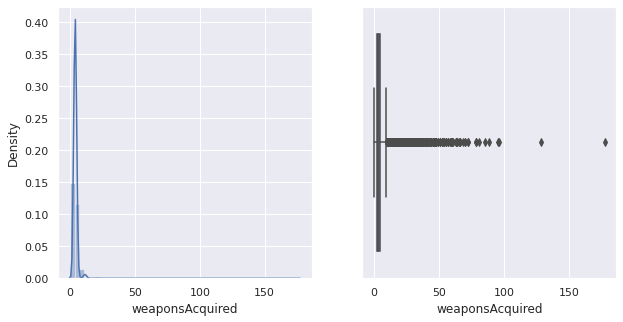

In [74]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.weaponsAcquired,kde=True,ax=axs[0])
sns.boxplot(x='weaponsAcquired',data=df,ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


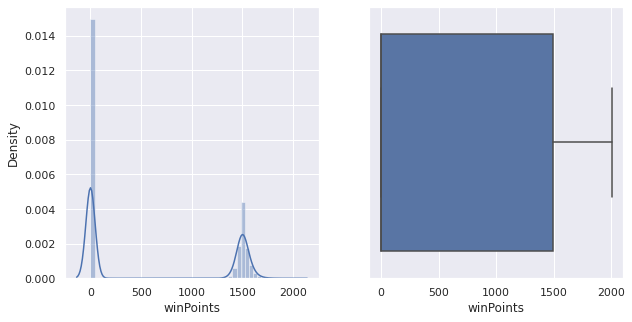

In [75]:
fig_dims=(10,5)
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.distplot(df.winPoints,kde=True,ax=axs[0])
sns.boxplot(x='winPoints',data=df,ax=axs[1])

In [ ]:
#Bivariate Analysis

In [12]:
df1.columns

Index(['Unnamed: 0', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

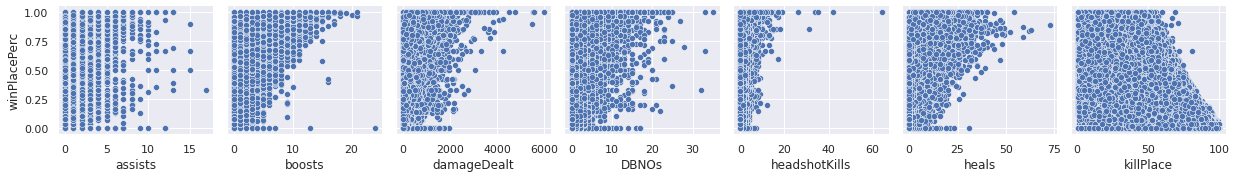

In [13]:
sns.pairplot(data = df1,
            x_vars = ['assists','boosts' ,'damageDealt' ,'DBNOs','headshotKills' ,'heals' ,'killPlace' ],
            y_vars = 'winPlacePerc')

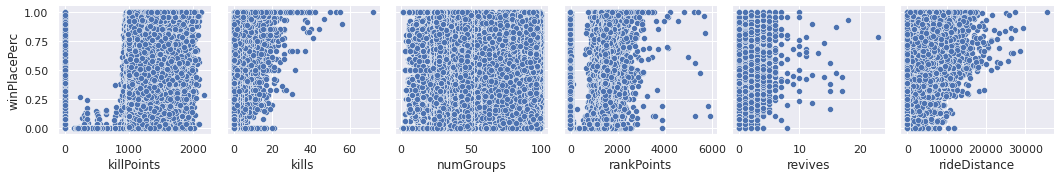

In [14]:
sns.pairplot(data = df1, 
             x_vars = ['killPoints','kills','numGroups','rankPoints','revives','rideDistance'],
             y_vars ='winPlacePerc')

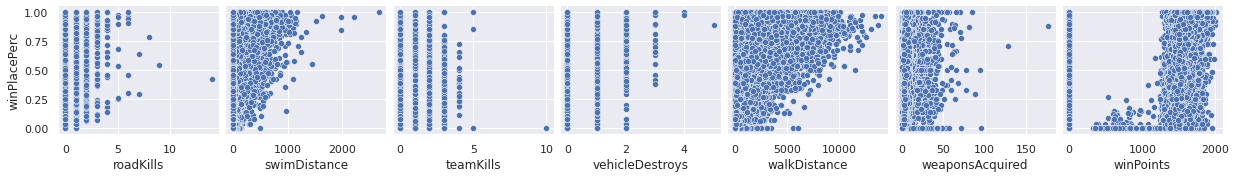

In [15]:
sns.pairplot(data = df1, 
             x_vars = ['roadKills','swimDistance','teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints',],
             y_vars ='winPlacePerc')

In [ ]:
#multivariate Analysis

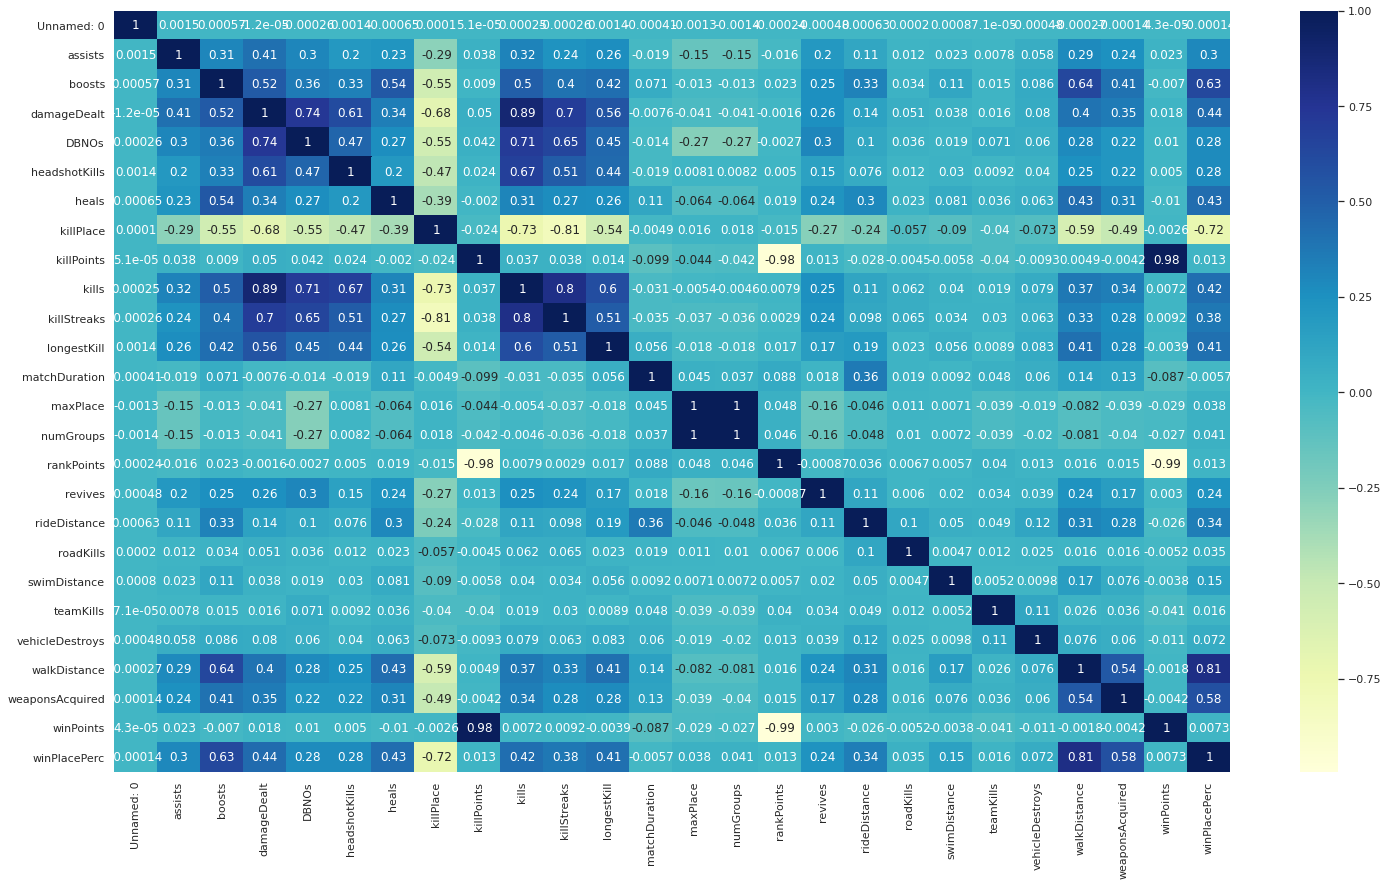

In [105]:
plt.figure(figsize=(25, 14))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")